In [ ]:
%cd src

In [3]:
# Load training data only
from optimizer import prepare_data
X, y = prepare_data()


Reading training data...
Train length:  200000
Frequency encoding...
Train shape: (200000, 402)
Scaling data...


In [10]:
X.shape, y.shape

((200000, 400), (200000,))

In [ ]:
# train regressor, not classifier to be able to later get AUC score and curve from the prediction score
from autofeat import AutoFeatRegressor

afreg = AutoFeatRegressor(verbose=1, feateng_steps=1)
df = afreg.fit_transform(X, y)


In [9]:
df.shape

(200000, 643)

In [10]:
df[:10]

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,exp(x052),Abs(x052),x170**3,x152**2,x077**3,x129**3,Abs(x192),Abs(x157),Abs(x099),Abs(x067)
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,1.444884,0.368029,-1.244714,0.208529,1.473088,-3.972843e-08,0.817469,1.493440,1.431860,1.424133
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.728466,0.316814,1.965865,0.358118,1.547356,1.751776e-02,0.443623,0.876395,0.773241,0.544300
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,1.921324,0.653014,-4.110532,1.156291,1.304360,6.334185e-02,0.174131,0.547758,0.386244,0.283326
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,2.377790,0.866172,-4.218287,0.000034,1.704980,-4.619649e-02,0.818468,0.645940,1.446567,1.584647
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,1.244903,0.219058,0.035506,0.352327,0.000014,-1.309726e+00,1.405987,1.399082,0.761214,1.401858
5,0.261965,-0.170512,0.716732,0.895541,-0.071610,1.097030,-1.011705,-0.386286,0.990612,-1.285952,...,0.349055,1.052525,-2.672188,0.404279,-0.069478,-9.519807e-04,2.274971,2.154577,0.448256,0.295010
6,0.371437,0.381335,-0.517172,-1.225915,0.035220,-0.375733,0.908316,-1.307391,-1.398976,0.288214,...,0.832228,0.183649,0.000219,1.217843,-0.178195,3.511127e+00,1.085390,0.937290,0.426618,0.222139
7,0.946725,-1.570475,1.197479,0.392485,-1.493417,0.749858,0.323159,1.691117,1.434466,-0.299689,...,0.303513,1.192330,8.295503,0.014621,0.082654,-1.152893e-01,1.395248,0.862860,1.605597,0.430575
8,1.785233,1.004985,1.217586,-0.569579,-1.402791,1.427949,-1.104942,-1.860832,-1.041930,1.227030,...,3.813700,1.338600,0.374319,0.343340,-0.017795,2.005411e-01,0.195032,1.698817,0.183295,1.119445
9,0.601599,0.889356,-0.688856,-0.658601,1.556217,-1.426966,0.755536,0.086350,-0.046648,0.324649,...,3.721657,1.314169,-0.337913,2.336210,-1.253331,-4.949122e-03,0.602494,0.620968,1.268857,1.312933


In [16]:
# save the model to be able to create new features later
import pickle
with open('autofeat_regressor.pickle', mode='wb') as fp:
    pickle.dump(afreg, fp)

In [4]:
# load pickle to make sure everything checked out
import pickle
with open('autofeat_regressor.pickle', mode='rb') as fp:
    afreg_loaded = pickle.load(fp)
df_loaded = afreg_loaded.transform(X)

[AutoFeat] Computing 243 new features.
[AutoFeat]   243/  243 new features ...done.


In [5]:
# some sanity checks
df_loaded.shape

(200000, 643)

In [6]:
df_loaded[:10]

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,exp(x052),Abs(x052),x170**3,x152**2,x077**3,x129**3,Abs(x192),Abs(x157),Abs(x099),Abs(x067)
0,-0.577102,-1.273737,0.451707,-0.833709,0.235571,-0.536430,-0.334926,0.608751,-1.561580,-1.473796,...,1.444884,0.368029,-1.244714,0.208529,1.473088,-3.972843e-08,0.817469,1.493440,1.431860,1.424133
1,0.269959,-0.622138,1.190360,-0.688846,0.790975,1.539900,0.244461,-0.003525,0.858974,0.419300,...,0.728466,0.316814,1.965865,0.358118,1.547356,1.751776e-02,0.443623,0.876395,0.773241,0.544300
2,-0.681113,-0.276066,0.516988,0.536516,-0.305477,-0.511033,1.769839,-0.564749,-1.561370,-1.307408,...,1.921324,0.653014,-4.110532,1.156291,1.304360,6.334185e-02,0.174131,0.547758,0.386244,0.283326
3,0.125158,-0.129426,-0.667575,0.195355,0.927992,0.410672,0.500633,-0.474201,-1.843910,0.548767,...,2.377790,0.866172,-4.218287,0.000034,1.704980,-4.619649e-02,0.818468,0.645940,1.446567,1.584647
4,-0.277303,0.035610,0.817683,-0.077829,0.738607,0.955574,0.613372,0.791544,1.794753,0.090006,...,1.244903,0.219058,0.035506,0.352327,0.000014,-1.309726e+00,1.405987,1.399082,0.761214,1.401858
5,0.261965,-0.170512,0.716732,0.895541,-0.071610,1.097030,-1.011705,-0.386286,0.990612,-1.285952,...,0.349055,1.052525,-2.672188,0.404279,-0.069478,-9.519807e-04,2.274971,2.154577,0.448256,0.295010
6,0.371437,0.381335,-0.517172,-1.225915,0.035220,-0.375733,0.908316,-1.307391,-1.398976,0.288214,...,0.832228,0.183649,0.000219,1.217843,-0.178195,3.511127e+00,1.085390,0.937290,0.426618,0.222139
7,0.946725,-1.570475,1.197479,0.392485,-1.493417,0.749858,0.323159,1.691117,1.434466,-0.299689,...,0.303513,1.192330,8.295503,0.014621,0.082654,-1.152893e-01,1.395248,0.862860,1.605597,0.430575
8,1.785233,1.004985,1.217586,-0.569579,-1.402791,1.427949,-1.104942,-1.860832,-1.041930,1.227030,...,3.813700,1.338600,0.374319,0.343340,-0.017795,2.005411e-01,0.195032,1.698817,0.183295,1.119445
9,0.601599,0.889356,-0.688856,-0.658601,1.556217,-1.426966,0.755536,0.086350,-0.046648,0.324649,...,3.721657,1.314169,-0.337913,2.336210,-1.253331,-4.949122e-03,0.602494,0.620968,1.268857,1.312933


In [11]:
(df == df_loaded)[:10]

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,exp(x052),Abs(x052),x170**3,x152**2,x077**3,x129**3,Abs(x192),Abs(x157),Abs(x099),Abs(x067)
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [12]:
# predict for roc auc
y_pred = afreg_loaded.predict(X)


[AutoFeat] Computing 243 new features.
[AutoFeat]   243/  243 new features ...done.


In [14]:
from matplotlib import pyplot as plt
def draw_roc_curve(fpr, tpr, roc_score, algo_name):
    lw=2
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=lw, label=f"ROC curve for training data (area = {roc_score:0.4f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    plt.title(algo_name)

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    plt.legend(loc="lower right")
    plt.show()

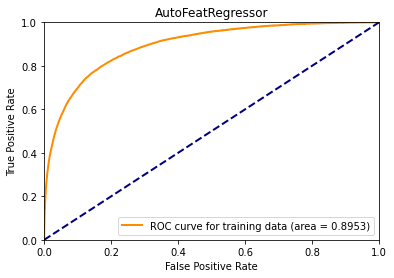

In [15]:
from sklearn import metrics
roc_score = metrics.roc_auc_score(y, y_pred)
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred)
draw_roc_curve(fpr, tpr, roc_score, 'AutoFeatRegressor')